# Ranker examples

In this notebook, we walk through the different usages of the ICARE package for ranking tasks (uncalibrated regression).

In [1]:
import pandas as pd
from sklearn import datasets
from icare.ranker import IcareRanker, BaggedIcareRanker
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score, ShuffleSplit
from icare.visualisation import plot_avg_sign

We use the california_housing dataset from scikit-learn.

In [27]:
dts = datasets.fetch_california_housing()
X, y = dts['data'], dts['target']
X = pd.DataFrame(data=X, columns=dts['feature_names'])
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


Both `IcareRanker` and `BaggedIcareRanker` can be used like any other scikit-learn estimator.

In [28]:
from icare.metrics import harrell_cindex

model = IcareRanker()
model.fit(X, y)
pred = model.predict(X)
print(harrell_cindex(y, -pred))

model = BaggedIcareRanker(n_estimators=100, n_jobs=-1)
model.fit(X, y)
pred = model.predict(X)
print(harrell_cindex(y, -pred))

0.7312352415266431
0.7186779783322461


They are compatible with any scikit-learn function.

In [29]:
from icare.metrics import harrell_cindex_scorer

print(1-cross_val_score(IcareRanker(), X, y,
                      cv=ShuffleSplit(n_splits=10, test_size=.25, random_state=42),
                      n_jobs=-1,
                      scoring=harrell_cindex_scorer).mean())

print(1-cross_val_score(BaggedIcareRanker(n_estimators=100,                                                 n_jobs=1),
                      X, y,
                      cv=ShuffleSplit(n_splits=10, test_size=.25, random_state=42),
                      n_jobs=-1,
                      scoring=harrell_cindex_scorer).mean())

0.7185426671099321
0.718883585984654


For interpretation, you can use the `plot_avg_sign` function to plot the average signs of the features in the estimators of the `BaggedIcareRanker` model (one estimator per class).

A positive sign means that the feature is concordant with the target value and the other way around for a negative sign. A value close to zero mean that the feature sign was unstable. This can be due to a low predictive power.

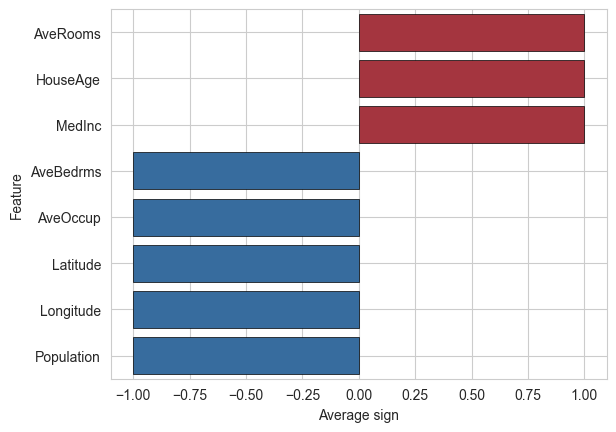

In [32]:
model = BaggedIcareRanker(n_estimators=100, n_jobs=-1)


model.fit(X,y)
plot_avg_sign(model)